### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации.

SVM с каким ядром дал лучший результат?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns

In [64]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
# print(faces.target_names)
# print(faces.images.shape)

In [2]:
# применяем метод уменьшения размерности, чтобы извлечь важные признаки
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

### 1. Ядро poly

In [16]:
svc = SVC(kernel='poly')

model = make_pipeline(pca, svc)

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 35, 50, 60]} # ради интереса добавила еще два параметра — 35 и 60
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

{'svc__C': 35}


In [19]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.07      0.12        15
     Colin Powell       1.00      0.16      0.28        68
  Donald Rumsfeld       0.00      0.00      0.00        31
    George W Bush       0.40      0.99      0.57       126
Gerhard Schroeder       0.50      0.04      0.08        23
      Hugo Chavez       1.00      0.05      0.10        20
Junichiro Koizumi       1.00      0.33      0.50        12
       Tony Blair       1.00      0.07      0.13        42

         accuracy                           0.43       337
        macro avg       0.74      0.21      0.22       337
     weighted avg       0.65      0.43      0.32       337



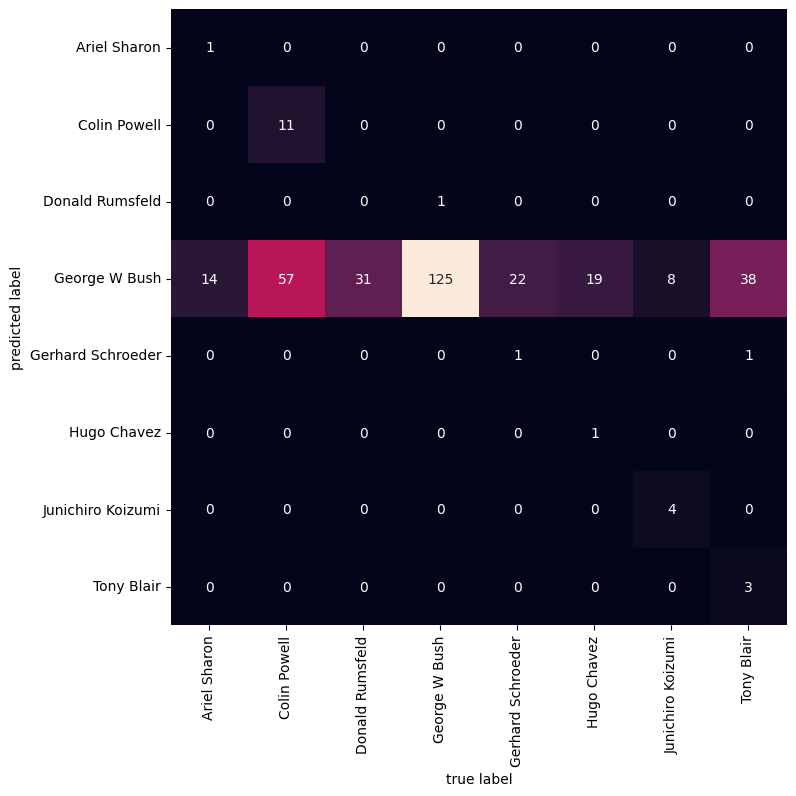

In [21]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Ядро rbf

In [24]:
svc = SVC(kernel='rbf')

model = make_pipeline(pca, svc)

In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 35, 50, 60]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 5}


In [27]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.67      0.80        15
     Colin Powell       0.88      0.90      0.89        68
  Donald Rumsfeld       0.95      0.58      0.72        31
    George W Bush       0.74      0.97      0.84       126
Gerhard Schroeder       0.93      0.61      0.74        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.83      0.91        12
       Tony Blair       0.92      0.79      0.85        42

         accuracy                           0.83       337
        macro avg       0.93      0.75      0.82       337
     weighted avg       0.86      0.83      0.83       337



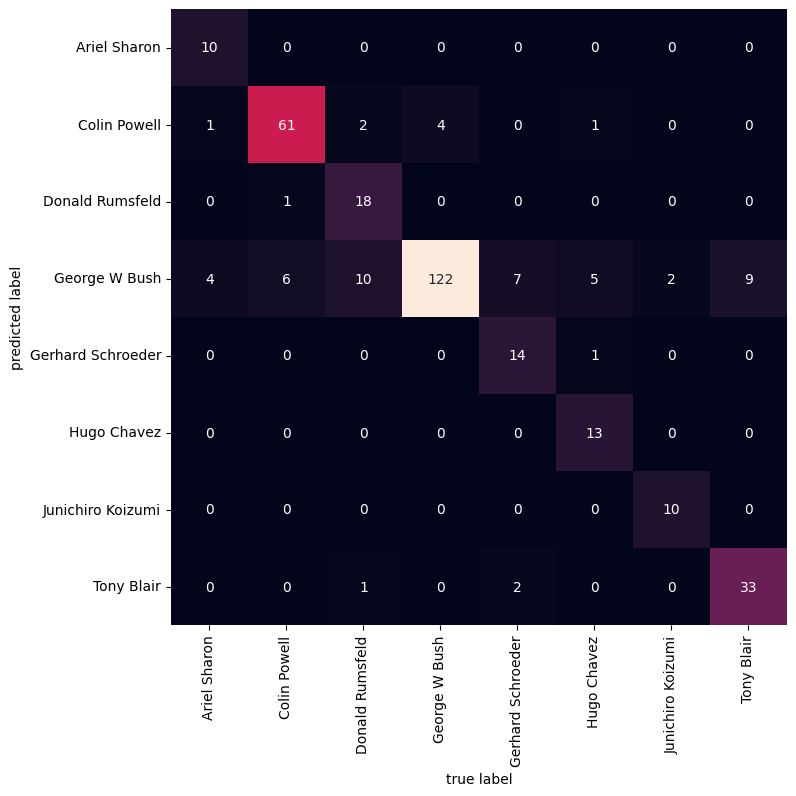

In [29]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Ядро sigmoid

In [32]:
svc = SVC(kernel='sigmoid')

model = make_pipeline(pca, svc)

In [33]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 35, 50, 60]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 1}


In [35]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.73      0.73        15
     Colin Powell       0.84      0.85      0.85        68
  Donald Rumsfeld       0.79      0.71      0.75        31
    George W Bush       0.82      0.89      0.85       126
Gerhard Schroeder       0.70      0.70      0.70        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.80      0.79      0.80        42

         accuracy                           0.82       337
        macro avg       0.83      0.78      0.80       337
     weighted avg       0.82      0.82      0.82       337



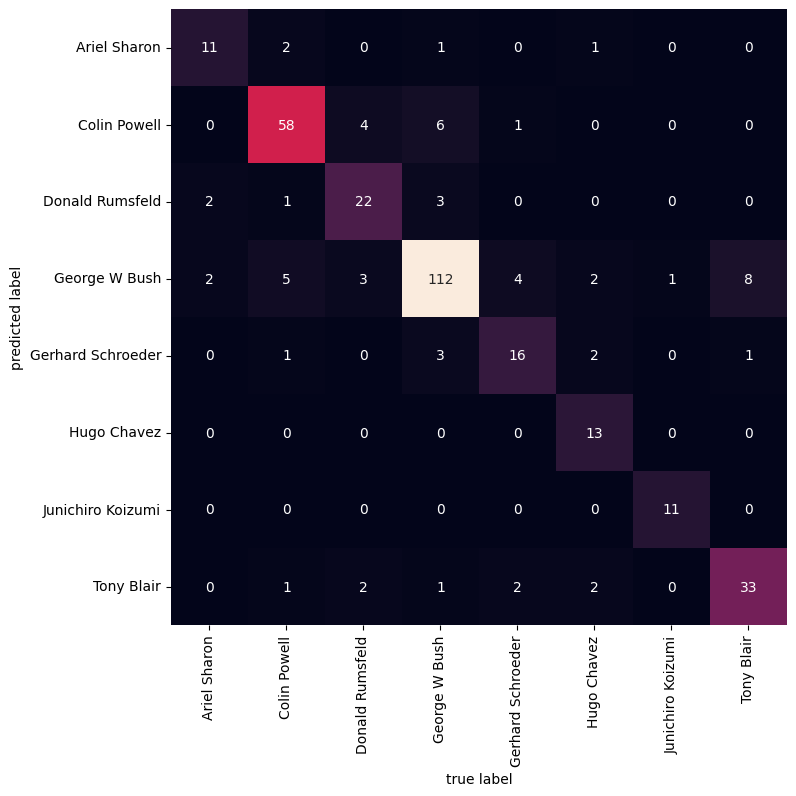

In [37]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Лучший результат получился с ядром rbf, с sigmoida немножко хуже, а с poly — очень-очень плохо...

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [66]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

lr = LogisticRegression(class_weight='balanced')

model = make_pipeline(pca, lr)

param_grid = {'logisticregression__C': np.arange(0.1, 1.1, 0.1)}
grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'logisticregression__C': 0.1}


In [67]:
model = grid.best_estimator_

yfit = model.predict(Xtest)
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.80      0.75        15
     Colin Powell       0.85      0.88      0.86        68
  Donald Rumsfeld       0.75      0.77      0.76        31
    George W Bush       0.96      0.80      0.87       126
Gerhard Schroeder       0.65      0.74      0.69        23
      Hugo Chavez       0.82      0.70      0.76        20
Junichiro Koizumi       0.75      1.00      0.86        12
       Tony Blair       0.75      0.95      0.84        42

         accuracy                           0.83       337
        macro avg       0.78      0.83      0.80       337
     weighted avg       0.84      0.83      0.83       337



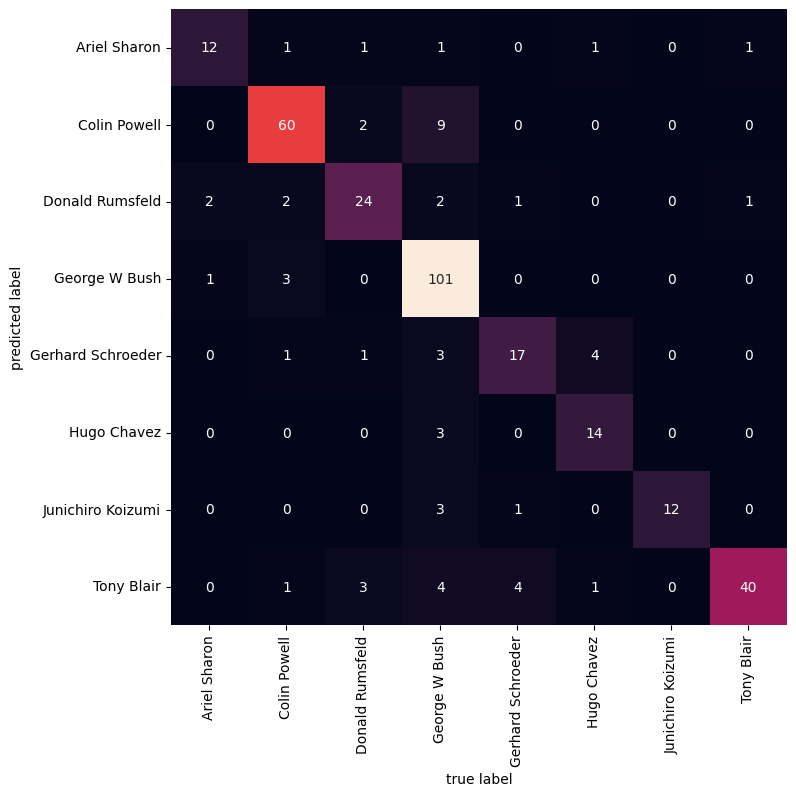

In [68]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Логистическая регрессия победила всех!

### Задание 3.

Разбалловка:

- 5 баллов: обучили один алгоритм и погридсерчили
- 10 баллов: попробовали обучить два и более алгоритмов, погридсерчили

Поработайте с датасетом winequalityN (целевая переменная - quality). Поэкспериментируйте с алгоритмами классификации, попробуйте подобрать гиперпараметры для них.

In [3]:
!wget https://raw.githubusercontent.com/yodiiin/mag2023/main/CL/term02/04-ClassificationTrees/winequalityN.csv

--2024-03-25 17:58:04--  https://raw.githubusercontent.com/yodiiin/mag2023/main/CL/term02/04-ClassificationTrees/winequalityN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390376 (381K) [text/plain]
Saving to: ‘winequalityN.csv’

winequalityN.csv    100%[===================>] 381.23K  --.-KB/s    in 0.008s  

2024-03-25 17:58:04 (49.0 MB/s) - ‘winequalityN.csv’ saved [390376/390376]



In [6]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [107]:
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [79]:
set(data.type)

{'red', 'white'}

In [8]:
data.type = data.type.apply(lambda x: 1 if x == 'red' else 0)

In [85]:
data.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3723,0,5.7,0.265,0.28,6.90,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7
346,0,5.6,0.340,0.10,1.30,0.031,20.0,68.0,0.99060,3.36,0.51,11.2,7
6098,1,7.7,0.570,0.21,1.50,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6
4896,0,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
2341,0,7.2,0.340,0.30,8.40,0.051,40.0,167.0,0.99756,3.48,0.62,9.7,5
507,0,6.0,0.240,0.27,1.90,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
6029,1,5.9,0.190,0.21,1.70,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5
5835,1,12.0,0.630,0.50,1.40,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,4
1386,0,5.6,0.490,0.13,4.50,0.039,17.0,116.0,0.99070,3.42,0.90,13.7,7
1993,0,7.4,0.300,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,6


<Axes: >

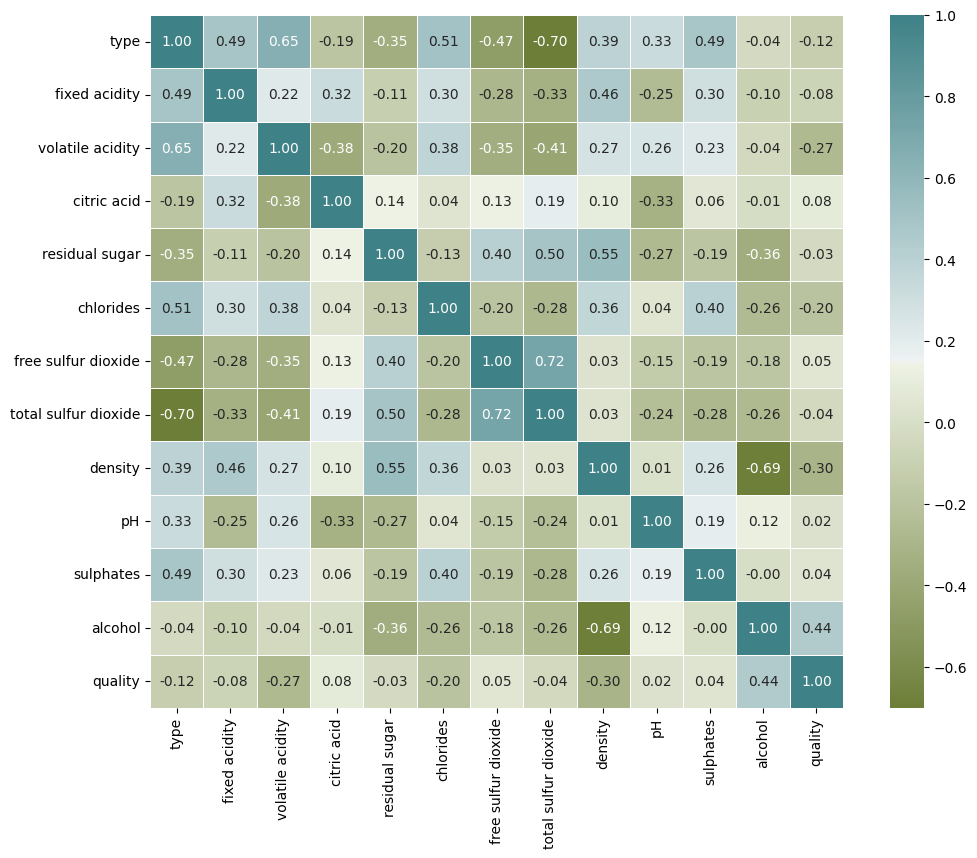

In [86]:
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [30]:
data.quality.value_counts() # дисбаланс классов :(

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

### Обучение моделей



*   логистическая регрессия
*   SVM
*   деревья решений



#### Логистическая регрессия

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)
y = data.quality
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, stratify=y)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

X = data.drop('quality', axis=1)
y = data.quality
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, stratify=y)

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(solver='liblinear', class_weight='balanced'))]) # указала solver, потому что регрессия не сходилась

param_grid = {'model__C': list(range(1, 100, 10))}
grid = GridSearchCV(pipe, param_grid, cv=5) # не совсем поняла, почему выдает предупреждение, потому что в самом маленьком классе объектов 5, а не 4
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'model__C': 71}


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

X = data.drop('quality', axis=1)
y = data.quality
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, stratify=y)

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(solver='liblinear', class_weight='balanced'))]) # указала solver, потому что регрессия не сходилась

param_grid = {'model__C': list(range(1, 100, 10))}
grid = GridSearchCV(pipe, param_grid, cv=3) # в зависимости от кол-ва фолдов сильно меняется гиперпараметр, но качество не изменяется
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'model__C': 1}


In [103]:
model = grid.best_estimator_

yfit = model.predict(Xtest)
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.15      0.28      0.20        54
           5       0.57      0.57      0.57       532
           6       0.56      0.43      0.48       705
           7       0.40      0.42      0.41       269
           8       0.15      0.19      0.17        48
           9       0.00      0.00      0.00         1

    accuracy                           0.46      1616
   macro avg       0.26      0.27      0.26      1616
weighted avg       0.51      0.46      0.48      1616



#### SVM

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='linear')

pipe = Pipeline([('scaler', MinMaxScaler()), ('model', SVC(kernel='linear'))])

param_grid = {'model__C': list(range(30, 55, 3))}
grid = GridSearchCV(model, param_grid, cv=3)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'model__C': 42}


In [75]:
model = grid.best_estimator_

yfit = model.predict(Xtest)
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.17      0.24      0.20        54
           5       0.57      0.57      0.57       532
           6       0.56      0.45      0.50       705
           7       0.40      0.43      0.41       269
           8       0.11      0.15      0.12        48
           9       0.00      0.00      0.00         1

    accuracy                           0.47      1616
   macro avg       0.26      0.26      0.26      1616
weighted avg       0.51      0.47      0.48      1616



#### Дерево решений

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(Xtrain, ytrain)
y_pred_dt = dt.predict(Xtest)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, ytest):.2f}")

Decision tree accuracy: 0.61
